# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
Data <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv', col_types=cols())

The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here
df_vacc_rates <- Data %>% 
                filter( mmr >= 0 ) %>%
                group_by( state ) %>% 
                summarize( frac_above_95=sum(mmr>=95, na.rm=T)/n() )

Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
df_vacc_rates %>% 
        arrange(frac_above_95)

state,frac_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

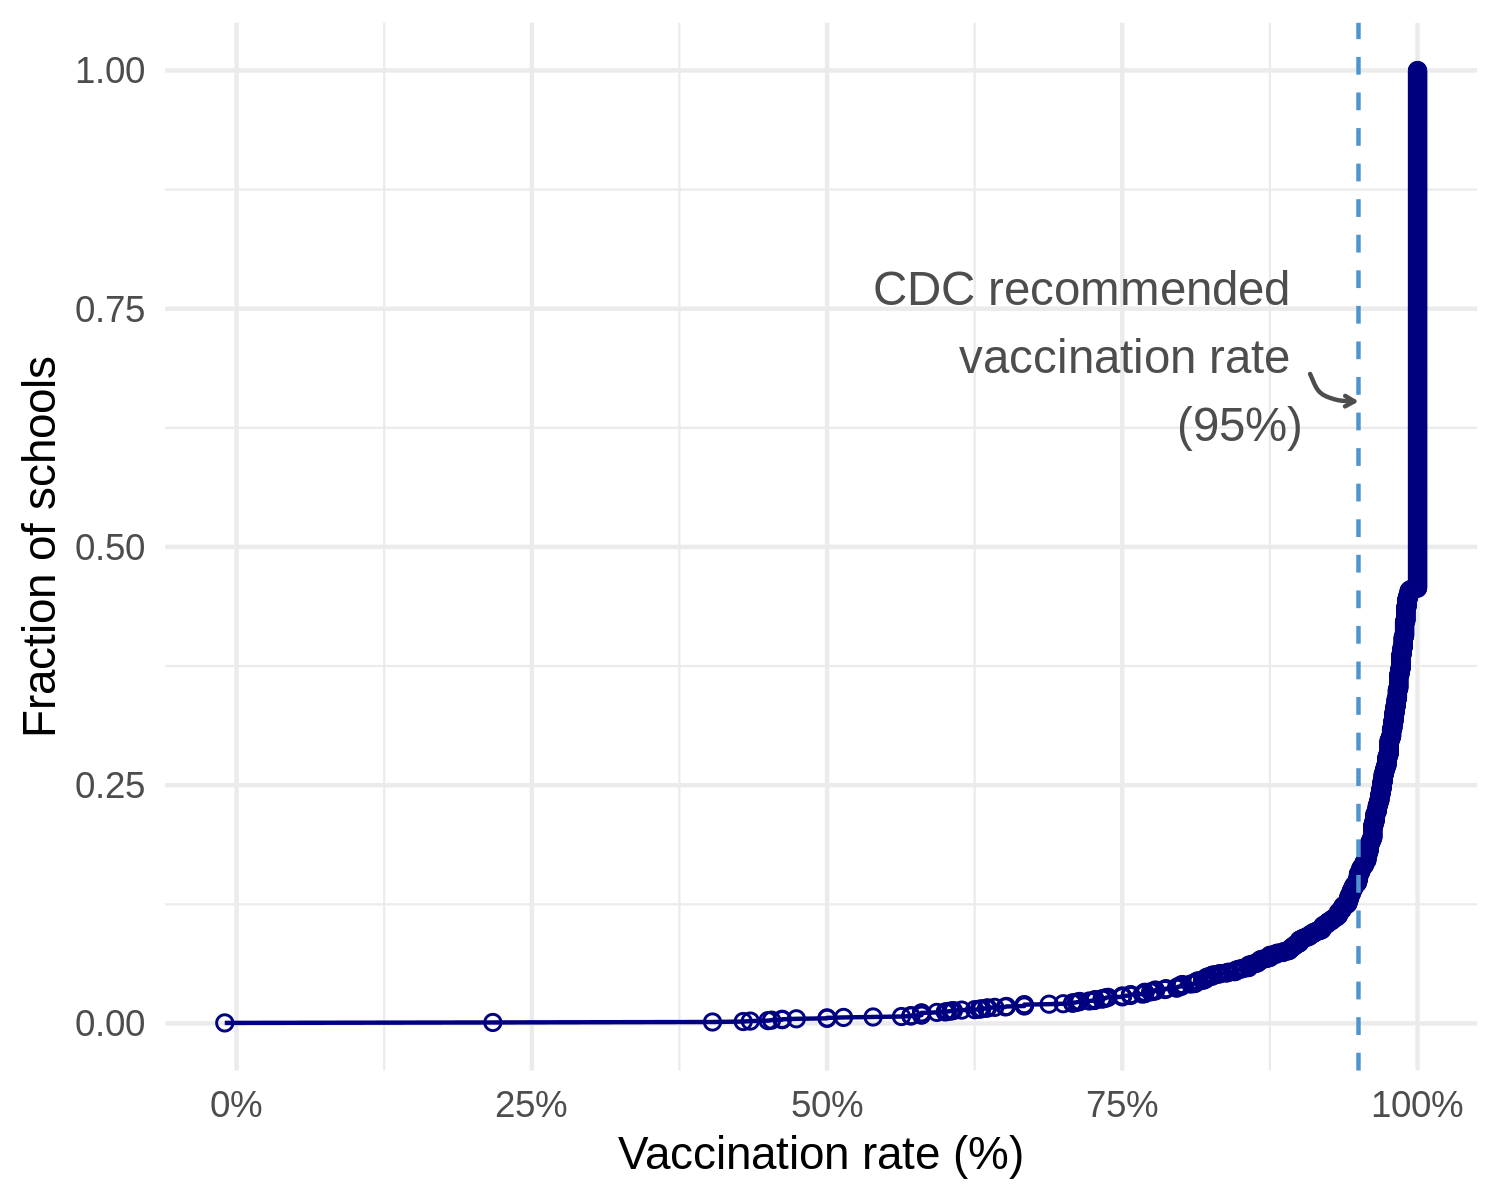

In [5]:
library(ggrepel)

ECDF <- Data %>% 
        filter(state=='North Carolina') %>% 
        arrange(overall) %>% 
        mutate(frac_overall=row_number()/max(row_number()))

p <- ggplot(ECDF, aes(x=overall, y=frac_overall))+
    geom_point(shape=1, color="navy")+
    geom_line(color="navy")+
    geom_vline(xintercept=95, linetype="dashed", color="steelblue3")+
    labs(x="Vaccination rate (%)", y="Fraction of schools")+
    scale_x_continuous(labels=scales::percent_format(scale=1))+
    theme_minimal()+
    geom_text_repel( data = data.frame(x=95, y=0.65), 
                    aes(x, y, label = "CDC recommended 
                                        vaccination rate 
                                        (95%)"), 
                    size=4, 
                    nudge_x=-6, 
                    nudge_y=.05, 
                    hjust="right", 
                    color="grey30", 
                    segment.size=.5, 
                    segment.curvature=.4, 
                    segment.ncp=1, 
                    arrow=arrow(length=unit(.01, "npc")) )
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [6]:
# According to the plot above, we can see that when Fraction of schools=0.50, 
# the Vaccination rate=100%>95%. 
# Hence, the median vaccination rate for NC schools is above the CDC recommended target. 

median(ECDF$overall)

[1] 100